# Import Packages

In [1]:
import pandas as pd
import numpy as np

# Load Datasets

## Weekly Stock Returns

### I. Load and concat dataset

In [2]:
# Load the weekly returns datasets
file_names = ['TRD_Week.csv', 'TRD_Week1.csv']
dataframes = [pd.read_csv(f'stock_returns/{file}') for file in file_names]

# Concat the datasets into a single dataframe
weekly_returns = pd.concat(dataframes, ignore_index=True)
weekly_returns

,Stkcd,Trdwnt,Wretnd,Markettype
0,1,2017-01,0.003297,4
1,1,2017-02,0.003286,4
2,1,2017-03,0.006550,4
3,1,2017-04,0.011931,4
4,1,2017-05,-0.007503,4
...,...,...,...,...
1221335,900957,2022-49,0.013223,2
1221336,900957,2022-50,-0.008157,2
1221337,900957,2022-51,-0.011513,2
1221338,900957,2022-52,-0.083195,2


### II. Filter dataframe to only contain A-Share stocks

In [3]:
# Filter the DataFrame to include only market types 1, 4, 64
weekly_returns = weekly_returns[weekly_returns['Markettype'].isin([1, 4, 64])]
weekly_returns['Markettype'].unique()

array([ 4, 64,  1], dtype=int64)

### III. Rename columns

In [4]:
# Rename the columns
weekly_returns.rename(columns={
    'Stkcd': 'stock_code',
    'Trdwnt': 'trading_week',
    'Wretnd': 'return_without_cash_dividend'
}, inplace=True)

# Display the updated DataFrame's column names
print("\nUpdated DataFrame column names:")
print(weekly_returns.columns)


Updated DataFrame column names:
Index(['stock_code', 'trading_week', 'return_without_cash_dividend',
       'Markettype'],
      dtype='object')


C:\Users\Darren\AppData\Local\Temp/ipykernel_18908/993920213.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_returns.rename(columns={


In [8]:
# Count unique stocks
weekly_returns['stock_code'].unique().size

3422

### IV. Save processed data

In [5]:
import os

In [6]:
# Specify the directory
folder_name = 'processed_data'
file_name = 'weekly_stock_returns.csv'
path = os.path.join(folder_name, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the DataFrame to CSV in the specified folder
weekly_returns.to_csv(path, index=False)

print(f"DataFrame saved to '{path}' successfully.")

DataFrame saved to 'processed_data\weekly_stock_returns.csv' successfully.


### V. Visualize stock returns

In [7]:
from matplotlib import pyplot as plt
import seaborn as sns

C:\Users\Darren\AppData\Local\Temp/ipykernel_16644/3611638756.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly_returns['Date'] = pd.to_datetime(weekly_returns['trading_week'] + '-1', format='%Y-%W-%w')


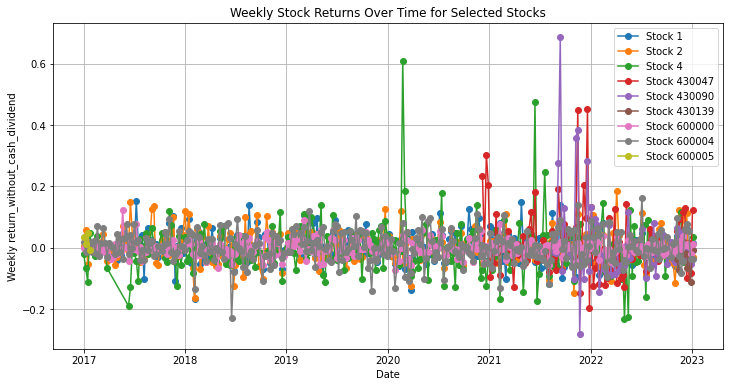

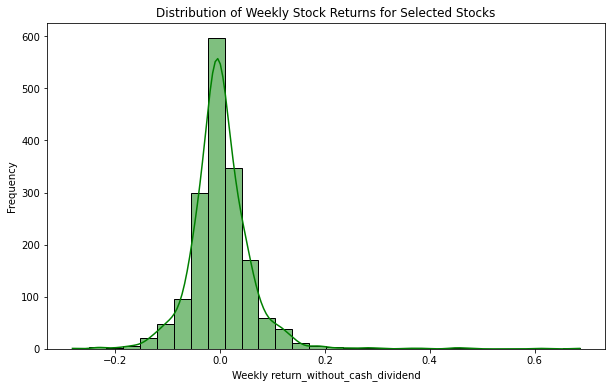

C:\Users\Darren\AppData\Local\Temp/ipykernel_16644/3611638756.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Year'] = filtered_df['Date'].dt.year


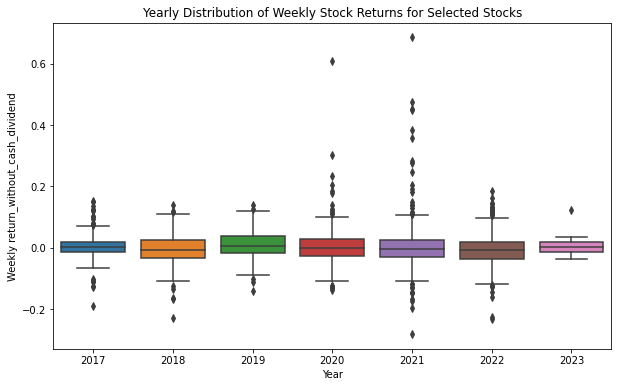

In [8]:
# Convert 'trading_week' from 'YYYY-WW' format to datetime for plotting
weekly_returns['Date'] = pd.to_datetime(weekly_returns['trading_week'] + '-1', format='%Y-%W-%w')

# Select three unique stocks from each market type
selected_stocks = []
for market_type in [1, 4, 64]:
    stocks = weekly_returns[weekly_returns['Markettype'] == market_type]['stock_code'].unique()
    selected_stocks.extend(stocks[:3])  # Pick the first three stocks for simplicity

# Filter weekly_returns for these selected stocks
filtered_df = weekly_returns[weekly_returns['stock_code'].isin(selected_stocks)]

# Plotting the time series of weekly returns for the selected stocks
plt.figure(figsize=(12, 6))
for stock_code in filtered_df['stock_code'].unique():
    stock_data = filtered_df[filtered_df['stock_code'] == stock_code]
    plt.plot(stock_data['Date'], stock_data['return_without_cash_dividend'], marker='o', linestyle='-', label=f'Stock {stock_code}')
plt.title('Weekly Stock Returns Over Time for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Weekly return_without_cash_dividend')
plt.grid(True)
plt.legend()
plt.savefig('graphs/stock_returns_time_series.png')
plt.show()

# Histogram of the weekly returns for selected stocks
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['return_without_cash_dividend'], bins=30, kde=True, color='green')
plt.title('Distribution of Weekly Stock Returns for Selected Stocks')
plt.xlabel('Weekly return_without_cash_dividend')
plt.ylabel('Frequency')
plt.savefig('graphs/stock_returns_distribution.png')
plt.show()

# Box plot of the weekly returns by year for selected stocks
filtered_df['Year'] = filtered_df['Date'].dt.year
plt.figure(figsize=(10, 6))
sns.boxplot(x='Year', y='return_without_cash_dividend', data=filtered_df)
plt.title('Yearly Distribution of Weekly Stock Returns for Selected Stocks')
plt.xlabel('Year')
plt.ylabel('Weekly return_without_cash_dividend')
plt.savefig('graphs/stock_returns_box_plot.png')
plt.show()

## Fama French Factors

### I. Load dataset

In [9]:
# Read the csv file
ff_factors = pd.read_csv('ff_factors/STK_MKT_THRFACWEEK.csv')
ff_factors

,MarkettypeID,TradingWeek,RiskPremium1,SMB1,HML1
0,P9705,2017-01,0.005356,-0.000178,-0.000631
1,P9706,2017-01,0.017257,0.004837,0.002980
2,P9707,2017-01,0.005704,0.002693,0.001165
3,P9709,2017-01,0.016467,0.003329,0.003478
4,P9710,2017-01,0.016191,0.003485,0.003469
...,...,...,...,...,...
5288,P9726,2022-52,0.012511,-0.000267,-0.004808
5289,P9717,2022-52,0.012627,-0.000565,-0.008205
5290,P9716,2022-52,0.012252,0.002380,-0.003582
5291,P9703,2022-52,0.010251,0.004053,-0.005483


### II. Filter A-Share market types

In [10]:
# Filter the DataFrame to include only market types 1, 4, 64
ff_factors = ff_factors[ff_factors['MarkettypeID'].isin(['P9701', 'P9703', 'P9718'])]
ff_factors['MarkettypeID'].unique()

array(['P9701', 'P9703', 'P9718'], dtype=object)

In [11]:
# Define the mapping from MarkettypeID to markettype
markettype_mapping = {
    'P9701': 1,
    'P9703': 4,
    'P9718': 64
}

# Apply the mapping to create the new 'markettype' column
ff_factors['markettype'] = ff_factors['MarkettypeID'].map(markettype_mapping)

ff_factors

C:\Users\Darren\AppData\Local\Temp/ipykernel_16644/2296367163.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_factors['markettype'] = ff_factors['MarkettypeID'].map(markettype_mapping)


,MarkettypeID,TradingWeek,RiskPremium1,SMB1,HML1,markettype
10,P9701,2017-01,0.018354,0.004408,0.000229,1
12,P9703,2017-01,0.014632,0.003898,0.003630,4
23,P9701,2017-02,-0.007301,-0.026808,0.010977,1
25,P9703,2017-02,-0.029871,-0.013320,0.007733,4
36,P9701,2017-03,0.006478,-0.032321,0.013063,1
...,...,...,...,...,...,...
5268,P9701,2022-51,-0.034304,-0.015656,0.001207,1
5269,P9703,2022-51,-0.043007,-0.001229,-0.005524,4
5280,P9718,2022-52,-0.005621,0.017056,-0.000535,64
5291,P9703,2022-52,0.010251,0.004053,-0.005483,4


### III. Rename columns

In [12]:
# Rename the columns
ff_factors.rename(columns={
    'TradingWeek': 'trading_week'
}, inplace=True)

# Display the updated DataFrame's column names
print("\nUpdated DataFrame column names:")
print(ff_factors.columns)


Updated DataFrame column names:
Index(['MarkettypeID', 'trading_week', 'RiskPremium1', 'SMB1', 'HML1',
       'markettype'],
      dtype='object')


C:\Users\Darren\AppData\Local\Temp/ipykernel_16644/2206900550.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_factors.rename(columns={


### IV. Save processed data

In [13]:
# Specify the directory
folder_name = 'processed_data'
file_name = 'ff_factors_processed.csv'
path = os.path.join(folder_name, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the DataFrame to CSV in the specified folder
ff_factors.to_csv(path, index=False)

print(f"DataFrame saved to '{path}' successfully.")

DataFrame saved to 'processed_data\ff_factors_processed.csv' successfully.


## Risk Free Rates

### I. Load dataset

In [14]:
# Load csv file
risk_free_rate = pd.read_excel("risk_free_rates/weekly_risk_free_rate.xlsx")
risk_free_rate

,trading_date_yw,risk_free_return
0,2017-01-01,0.000571
1,2017-01-08,0.000738
2,2017-01-15,0.000543
3,2017-01-22,0.000774
4,2017-01-29,0.000802
...,...,...
307,2022-11-26,0.000444
308,2022-12-03,0.000471
309,2022-12-10,0.000477
310,2022-12-17,0.000459


### II. Add necessary column

In [15]:
# Convert into datetime object
risk_free_rate['trading_date_yw'] = pd.to_datetime(risk_free_rate['trading_date_yw'])

# Add formatted week-year column
risk_free_rate['week_year'] = risk_free_rate['trading_date_yw'].dt.strftime('%Y-%U')

risk_free_rate

,trading_date_yw,risk_free_return,week_year
0,2017-01-01,0.000571,2017-01
1,2017-01-08,0.000738,2017-02
2,2017-01-15,0.000543,2017-03
3,2017-01-22,0.000774,2017-04
4,2017-01-29,0.000802,2017-05
...,...,...,...
307,2022-11-26,0.000444,2022-47
308,2022-12-03,0.000471,2022-48
309,2022-12-10,0.000477,2022-49
310,2022-12-17,0.000459,2022-50


### III. Save processed data

In [16]:
# Specify the directory
folder_name = 'processed_data'
file_name = 'risk_free_rates_processed.csv'
path = os.path.join(folder_name, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the DataFrame to CSV in the specified folder
risk_free_rate.to_csv(path, index=False)

print(f"DataFrame saved to '{path}' successfully.")

DataFrame saved to 'processed_data\risk_free_rates_processed.csv' successfully.


# CAPM Construction

## I. Calculate Weekly Market Return

In [17]:
# Calculate weekly market returns as the mean value of weekly returns of all mainboard stocks
market_return = weekly_returns.groupby('trading_week')['return_without_cash_dividend'].mean().reset_index()
market_return = market_return.rename(columns={'return_without_cash_dividend': 'market_return'})

In [18]:
market_return

,trading_week,market_return
0,2017-01,0.018377
1,2017-02,-0.032801
2,2017-03,-0.015996
3,2017-04,0.018515
4,2017-05,-0.002261
...,...,...
303,2022-49,0.028340
304,2022-50,0.003581
305,2022-51,-0.014400
306,2022-52,-0.048004


## II. Merge necessary datasets

In [19]:
weekly_returns = pd.merge(weekly_returns, market_return, left_on='trading_week', right_on='trading_week', how = "left")
weekly_returns = pd.merge(weekly_returns, risk_free_rate, left_on = "trading_week", right_on = "week_year", how = "left")
weekly_returns

,stock_code,trading_week,return_without_cash_dividend,Markettype,Date,market_return,trading_date_yw,risk_free_return,week_year
0,1,2017-01,0.003297,4,2017-01-02,0.018377,2017-01-01,0.000571,2017-01
1,1,2017-02,0.003286,4,2017-01-09,-0.032801,2017-01-08,0.000738,2017-02
2,1,2017-03,0.006550,4,2017-01-16,-0.015996,2017-01-15,0.000543,2017-03
3,1,2017-04,0.011931,4,2017-01-23,0.018515,2017-01-22,0.000774,2017-04
4,1,2017-05,-0.007503,4,2017-01-30,-0.002261,2017-01-29,0.000802,2017-05
...,...,...,...,...,...,...,...,...,...
889066,873527,2022-49,-0.005513,64,2022-12-05,0.028340,2022-12-10,0.000477,2022-49
889067,873527,2022-50,-0.024390,64,2022-12-12,0.003581,2022-12-17,0.000459,2022-50
889068,873527,2022-51,-0.019318,64,2022-12-19,-0.014400,2022-12-24,0.000432,2022-51
889069,873527,2022-52,-0.067207,64,2022-12-26,-0.048004,NaT,NaN,NaN


In [20]:
# Drop missing values
weekly_returns = weekly_returns.dropna()

## III. First Regression

In [21]:
import statsmodels.api as sm

In [22]:
# Filter data in their respective period
period_data = weekly_returns[(weekly_returns['trading_week'] >= '2017-01') & (weekly_returns['trading_week'] <= '2018-52')]
period_data

,stock_code,trading_week,return_without_cash_dividend,Markettype,Date,market_return,trading_date_yw,risk_free_return,week_year
0,1,2017-01,0.003297,4,2017-01-02,0.018377,2017-01-01,0.000571,2017-01
1,1,2017-02,0.003286,4,2017-01-09,-0.032801,2017-01-08,0.000738,2017-02
2,1,2017-03,0.006550,4,2017-01-16,-0.015996,2017-01-15,0.000543,2017-03
3,1,2017-04,0.011931,4,2017-01-23,0.018515,2017-01-22,0.000774,2017-04
4,1,2017-05,-0.007503,4,2017-01-30,-0.002261,2017-01-29,0.000802,2017-05
...,...,...,...,...,...,...,...,...,...
869398,603999,2018-47,-0.015152,1,2018-11-19,-0.053329,2018-11-26,0.000511,2018-47
869399,603999,2018-48,-0.055769,1,2018-11-26,-0.002281,2018-12-03,0.000506,2018-48
869400,603999,2018-49,0.120163,1,2018-12-03,0.015767,2018-12-10,0.000510,2018-49
869401,603999,2018-50,-0.067273,1,2018-12-10,-0.018287,2018-12-17,0.000551,2018-50


In [23]:
# Initialize empty dictionary for the betas
betas = {}

# Loop through the regression
for stock_code in period_data['stock_code'].unique():
    stock_data = period_data[period_data['stock_code'] == stock_code]
    
    # define stock and market excess returns
    stock_excess_returns = stock_data['return_without_cash_dividend'] - stock_data['risk_free_return']
    market_excess_returns = stock_data['market_return'] - stock_data['risk_free_return']
    
    # define the independent and dependent variables
    X = sm.add_constant(market_excess_returns)
    Y = stock_excess_returns
    
    # Fit the model
    model = sm.OLS(Y, X).fit()
    
    # Append data to initialized dictionary
    betas[stock_code] = model.params[0]

# Store betas in a dataframe  
betas_df = pd.DataFrame(list(betas.items()), columns=['stock_code', 'Beta'])
betas_df

,stock_code,Beta
0,1,0.329615
1,2,0.624570
2,4,0.582283
3,5,1.010754
4,6,1.176713
...,...,...
2827,603993,1.271242
2828,603996,1.137591
2829,603997,0.898236
2830,603998,1.216438


In [24]:
# Merge betas with the weekly returns
weekly_returns = pd.merge(weekly_returns, betas_df, on='stock_code', how='left')
weekly_returns = weekly_returns.dropna()
weekly_returns

,stock_code,trading_week,return_without_cash_dividend,Markettype,Date,market_return,trading_date_yw,risk_free_return,week_year,Beta
0,1,2017-01,0.003297,4,2017-01-02,0.018377,2017-01-01,0.000571,2017-01,0.329615
1,1,2017-02,0.003286,4,2017-01-09,-0.032801,2017-01-08,0.000738,2017-02,0.329615
2,1,2017-03,0.006550,4,2017-01-16,-0.015996,2017-01-15,0.000543,2017-03,0.329615
3,1,2017-04,0.011931,4,2017-01-23,0.018515,2017-01-22,0.000774,2017-04,0.329615
4,1,2017-05,-0.007503,4,2017-01-30,-0.002261,2017-01-29,0.000802,2017-05,0.329615
...,...,...,...,...,...,...,...,...,...,...
842224,603999,2022-47,0.021484,1,2022-11-21,0.010169,2022-11-26,0.000444,2022-47,1.357879
842225,603999,2022-48,0.005736,1,2022-11-28,-0.009893,2022-12-03,0.000471,2022-48,1.357879
842226,603999,2022-49,0.043726,1,2022-12-05,0.028340,2022-12-10,0.000477,2022-49,1.357879
842227,603999,2022-50,-0.023679,1,2022-12-12,0.003581,2022-12-17,0.000459,2022-50,1.357879


In [25]:
# Save result data
# Specify the directory
folder_name = 'results'
file_name = 'CAPM_first_regression.csv'
path = os.path.join(folder_name, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the DataFrame to CSV in the specified folder
weekly_returns.to_csv(path, index=False)

print(f"DataFrame saved to '{path}' successfully.")

DataFrame saved to 'results\CAPM_first_regression.csv' successfully.


## IV. Second Regression

In [26]:
# Filter data into distinguish periods
second_period_data = weekly_returns[(weekly_returns['trading_week'] >= '2019-01') & (weekly_returns['trading_week'] <= '2020-52')].copy()

# Construct stock portfolios
second_period_data['Portfolio'] = pd.qcut(second_period_data['Beta'], q=10, labels=False) + 1
second_period_data

,stock_code,trading_week,return_without_cash_dividend,Markettype,Date,market_return,trading_date_yw,risk_free_return,week_year,Beta,Portfolio
101,1,2019-01,0.039446,4,2019-01-07,0.017286,2019-01-08,0.000500,2019-01,0.329615,1
102,1,2019-02,0.046154,4,2019-01-14,0.030281,2019-01-15,0.000498,2019-02,0.329615,1
103,1,2019-03,0.022549,4,2019-01-21,0.002105,2019-01-22,0.000493,2019-03,0.329615,1
104,1,2019-04,0.054650,4,2019-01-28,-0.005404,2019-01-29,0.000484,2019-04,0.329615,1
105,1,2019-05,0.018182,4,2019-02-04,-0.032086,2019-02-05,0.000482,2019-05,0.329615,1
...,...,...,...,...,...,...,...,...,...,...,...
842126,603999,2020-47,0.037866,1,2020-11-23,0.022743,2020-11-25,0.000585,2020-47,1.357879,9
842127,603999,2020-48,-0.009950,1,2020-11-30,-0.008108,2020-12-02,0.000584,2020-48,1.357879,9
842128,603999,2020-49,0.031826,1,2020-12-07,0.013901,2020-12-09,0.000573,2020-49,1.357879,9
842129,603999,2020-50,-0.058442,1,2020-12-14,-0.038091,2020-12-16,0.000549,2020-50,1.357879,9


In [27]:
# Construct portfolio returns dataframe
portfolio_returns = second_period_data.groupby(['trading_week', 'Portfolio']).apply(
    lambda x: (x['return_without_cash_dividend']).mean() - x['risk_free_return'].mean()
).reset_index(name='portfolio_return')

In [28]:
# Merge portfolio returns with weekly returns
rf_rm = weekly_returns[['trading_week', 'market_return', 'risk_free_return']].drop_duplicates()
portfolio_returns = pd.merge(portfolio_returns, rf_rm, on = "trading_week", how = "left")
portfolio_returns

,trading_week,Portfolio,portfolio_return,market_return,risk_free_return
0,2019-01,1,-0.004851,0.017286,0.000500
1,2019-01,2,0.007971,0.017286,0.000500
2,2019-01,3,0.008825,0.017286,0.000500
3,2019-01,4,0.016450,0.017286,0.000500
4,2019-01,5,0.023002,0.017286,0.000500
...,...,...,...,...,...
995,2020-51,6,-0.005691,0.003356,0.000509
996,2020-51,7,-0.002619,0.003356,0.000509
997,2020-51,8,-0.004732,0.003356,0.000509
998,2020-51,9,0.018319,0.003356,0.000509


In [29]:
# Initialize results
results = []

# Loop through the portfolios
for portfolio in portfolio_returns['Portfolio'].unique():
    portfolio_data = portfolio_returns[portfolio_returns['Portfolio'] == portfolio]
    
    # Define independent and dependent variables
    port_excess_returns = portfolio_data['portfolio_return'] - portfolio_data['risk_free_return']
    market_excess_returns = portfolio_data['market_return'] - portfolio_data['risk_free_return']
    
    # Fit the model
    X = sm.add_constant(market_excess_returns)
    Y = port_excess_returns
    model = sm.OLS(Y, X).fit()
    
    # Define result parameters
    alpha = model.params['const']
    beta = model.params[0]
    t_alpha = model.tvalues['const']
    t_beta = model.tvalues[0]
    p_alpha = model.pvalues['const']
    p_beta = model.pvalues[0]
    r_squared = model.rsquared
    
    # Append to empty list
    results.append({
        'Portfolio': portfolio,
        'alpha': alpha,
        't_alpha': t_alpha,
        'p_alpha': p_alpha,
        'beta': beta,
        't_beta': t_beta,
        'p_beta': p_beta,
        'R_squared': r_squared
    })

# Output result as a dataframe
results_df = pd.DataFrame(results)
results_df.rename(columns={
    'alpha': 'αp',
    't_alpha': 't-value αp',
    'p_alpha': 'Sign. αp',
    'beta': 'βp',
    't_beta': 't-value βp',
    'p_beta': 'Sign. βp',
    'R_squared': 'R²'
}, inplace=True)

In [30]:
results_df

,Portfolio,αp,t-value αp,Sign. αp,βp,t-value βp,Sign. βp,R²
0,1,-0.001638,-2.467925,0.015323,0.795472,38.042273,1.693481e-60,0.936578
1,2,-0.000626,-1.172389,0.243883,0.893331,53.130595,4.704674e-74,0.966448
2,3,-0.000373,-0.928666,0.355344,0.896493,70.804580,5.773329e-86,0.980827
3,4,0.000038,0.085045,0.932399,0.942984,66.773262,1.607674e-83,0.978493
4,5,-0.000591,-1.782435,0.077775,1.003831,96.107876,8.761333e-99,0.989502
5,6,-0.000551,-1.494864,0.138163,1.042660,89.888868,5.729693e-96,0.988017
6,7,-0.000785,-2.239523,0.027382,1.043940,94.510366,4.450672e-98,0.989148
7,8,-0.000595,-1.294898,0.198398,1.095274,75.648584,9.887671e-89,0.983164
8,9,-0.000333,-0.699338,0.485997,1.094475,72.997362,3.070814e-87,0.981941
9,10,-0.001417,-2.405135,0.018044,1.148614,61.882329,2.340986e-80,0.975047


In [31]:
# Save result df
# Specify the directory
folder_name = 'results'
file_name = 'CAPM_second_regression.csv'
path = os.path.join(folder_name, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the DataFrame to CSV in the specified folder
results_df.to_csv(path, index=False)

print(f"DataFrame saved to '{path}' successfully.")

DataFrame saved to 'results\CAPM_second_regression.csv' successfully.


## V. Third Regression

In [32]:
# Filter into distinguish period
final_period_data = weekly_returns[(weekly_returns['trading_week'] >= '2021-01') & (weekly_returns['trading_week'] <= '2022-52')].copy()

# Construct stock portfolios
final_period_data['Portfolio'] = pd.qcut(final_period_data['Beta'], q=10, labels=False) + 1

final_period_data

,stock_code,trading_week,return_without_cash_dividend,Markettype,Date,market_return,trading_date_yw,risk_free_return,week_year,Beta,Portfolio
201,1,2021-02,0.026370,4,2021-01-11,-0.019588,2021-01-15,0.000504,2021-02,0.329615,1
202,1,2021-03,0.057935,4,2021-01-18,-0.013581,2021-01-22,0.000554,2021-03,0.329615,1
203,1,2021-04,0.049048,4,2021-01-25,0.018125,2021-01-29,0.000558,2021-04,0.329615,1
204,1,2021-05,0.048116,4,2021-02-01,-0.042990,2021-02-05,0.000546,2021-05,0.329615,1
205,1,2021-06,0.079688,4,2021-02-08,-0.030278,2021-02-12,0.000553,2021-06,0.329615,1
...,...,...,...,...,...,...,...,...,...,...,...
842224,603999,2022-47,0.021484,1,2022-11-21,0.010169,2022-11-26,0.000444,2022-47,1.357879,9
842225,603999,2022-48,0.005736,1,2022-11-28,-0.009893,2022-12-03,0.000471,2022-48,1.357879,9
842226,603999,2022-49,0.043726,1,2022-12-05,0.028340,2022-12-10,0.000477,2022-49,1.357879,9
842227,603999,2022-50,-0.023679,1,2022-12-12,0.003581,2022-12-17,0.000459,2022-50,1.357879,9


In [33]:
# Cross sectional portfolio returns
cross_sect_portfolio_returns = final_period_data.groupby(['trading_week', 'Portfolio']).apply(
    lambda x: (x['return_without_cash_dividend']).mean() - x['risk_free_return'].mean()
).reset_index(name='portfolio_return')
cross_sect_portfolio_returns

,trading_week,Portfolio,portfolio_return
0,2021-02,1,-0.002976
1,2021-02,2,-0.003366
2,2021-02,3,-0.009048
3,2021-02,4,-0.014966
4,2021-02,5,-0.018602
...,...,...,...
975,2022-51,6,-0.012594
976,2022-51,7,-0.016818
977,2022-51,8,-0.018568
978,2022-51,9,-0.015300


In [34]:
# Group by portfolios
cross_sect_portfolio_returns = cross_sect_portfolio_returns.groupby(["Portfolio"]).mean()
cross_sect_portfolio_returns

C:\Users\Darren\AppData\Local\Temp/ipykernel_16644/3793029508.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cross_sect_portfolio_returns = cross_sect_portfolio_returns.groupby(["Portfolio"]).mean()


,portfolio_return
Portfolio,
1,0.001546
2,0.001900
3,0.001744
4,0.001584
5,0.002378
6,0.001881
7,0.002713
8,0.002052
9,0.002720


In [35]:
# Fit into a OLS regression model
X = sm.add_constant(results_df["βp"].values)
Y = cross_sect_portfolio_returns["portfolio_return"].values
model = sm.OLS(Y, X).fit()

In [36]:
# Initialize empty result list
results = []

# Define parameters
alpha = model.params[0]
beta = model.params[1]
t_alpha = model.tvalues[0]
t_beta = model.tvalues[1]
p_alpha = model.pvalues[0]
p_beta = model.pvalues[1]
r_squared = model.rsquared

# Append to result list
results.append({
        'alpha': alpha,
        't_alpha': t_alpha,
        'p_alpha': p_alpha,
        'beta': beta,
        't_beta': t_beta,
        'p_beta': p_beta,
        'R_squared': r_squared
    })

# Convert result into a dataframe
final_result = pd.DataFrame(results)
final_result.rename(columns={
    'alpha': 'γ0',
    't_alpha': 't-value γ0',
    'p_alpha': 'Sign. γ0',
    'beta': 'γ1',
    't_beta': 't-value γ1',
    'p_beta': 'Sign. γ1',
    'R_squared': 'R²'
}, inplace=True)

In [37]:
final_result

,γ0,t-value γ0,Sign. γ0,γ1,t-value γ1,Sign. γ1,R²
0,-0.001325,-1.371003,0.2076,0.003476,3.601738,0.006965,0.618548


In [38]:
# Specify the directory
folder_name = 'results'
file_name = 'CAPM_third_regression.csv'
path = os.path.join(folder_name, file_name)

# Check if the directory exists, if not, create it
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Save the DataFrame to CSV in the specified folder
final_result.to_csv(path, index=False)

print(f"DataFrame saved to '{path}' successfully.")

DataFrame saved to 'results\CAPM_third_regression.csv' successfully.
